In [44]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import AgglomerativeClustering
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [45]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [46]:
df_norm=norm_func(data.iloc[1:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [47]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(data.iloc[1:,1:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
1,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
2,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
3,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
4,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


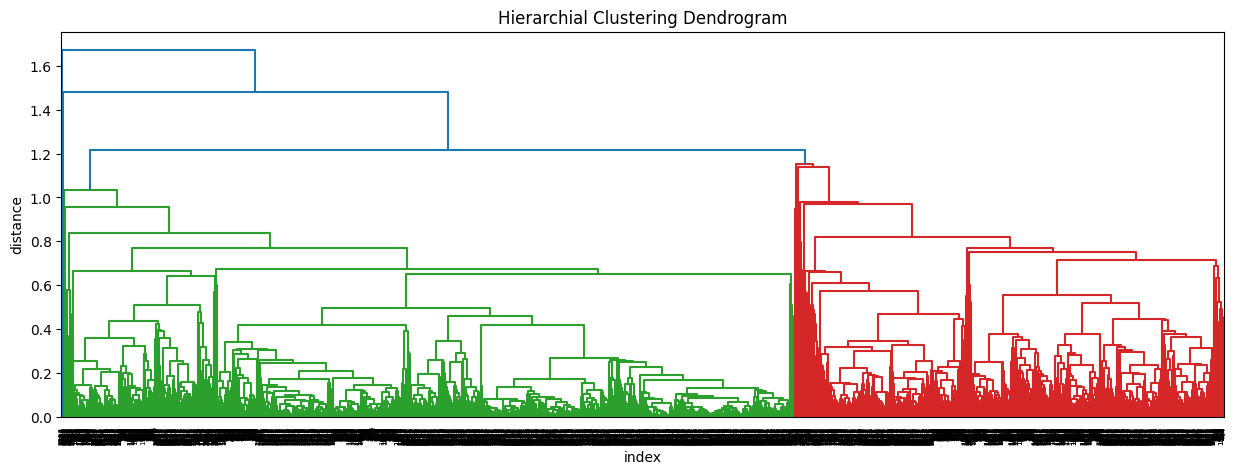

In [48]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
p=np.array(df_norm) # converting it into numpy array format
z=linkage(df_norm,method='average',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z)
plt.show()

In [49]:
# K means Clustering#
from sklearn.cluster import KMeans

In [50]:
# Determine the optimum number of clusters using the Elbow method
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


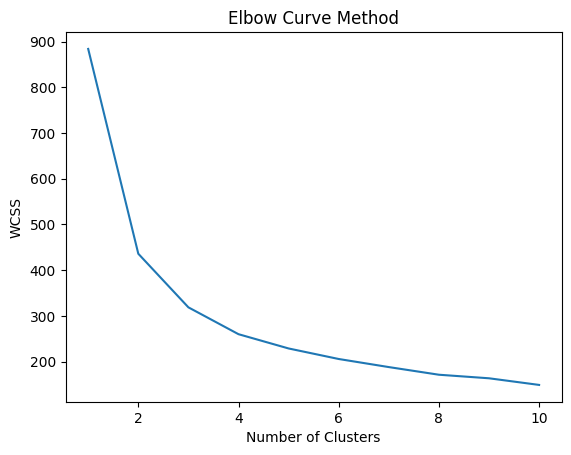

In [51]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve Method')
plt.show()

In [52]:
# As this dataset is large in number will go for DBSCAN model
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [54]:
df = data.drop(['Award?'],axis=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


In [55]:
array=df.values
array

array([[    1, 28143,     0, ...,     0,     0,  7000],
       [    2, 19244,     0, ...,     0,     0,  6968],
       [    3, 41354,     0, ...,     0,     0,  7034],
       ...,
       [ 4019, 73597,     0, ...,     0,     0,  1402],
       [ 4020, 54899,     0, ...,   500,     1,  1401],
       [ 4021,  3016,     0, ...,     0,     0,  1398]])

In [56]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [57]:
dbscan=DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [58]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [59]:
clusters=dbscan.fit_predict(X)
clusters

array([ 0,  0,  0, ..., -1,  0,  0])

In [60]:
X = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']]


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

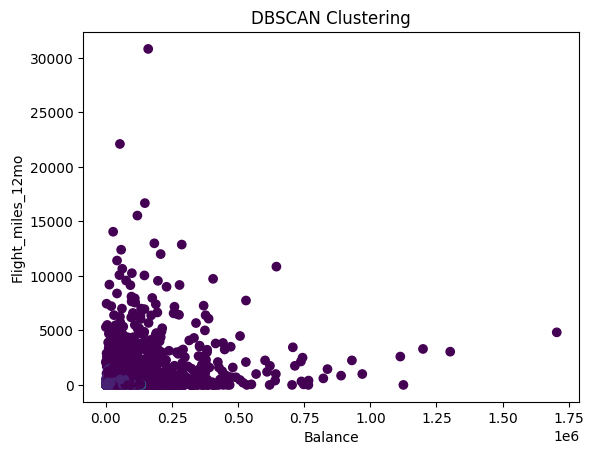

In [67]:
plt.scatter(data['Balance'], data['Flight_miles_12mo'],c=dbscan.labels_, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Flight_miles_12mo')
plt.title('DBSCAN Clustering')
plt.show()

In [68]:
d1=dbscan.labels_

In [69]:
import sklearn
sklearn.metrics.silhouette_score(X,d1)

-0.5336310837169187

In [73]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)

In [74]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [75]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster'])
cl1

,Kcluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [78]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.6463114761575564